# THE PROBLEM STATEMENT AND BUSINESS CASE

data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# IMPORT LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_csv("twitterdata.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df.drop(["id"],axis=1,inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


# EXPLORATORY DATA ANALYSIS

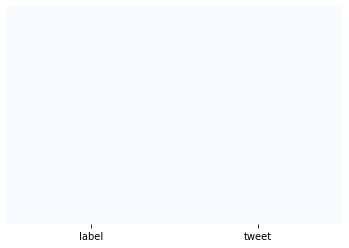

In [9]:
 sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002199B1B1808>]],
      dtype=object)

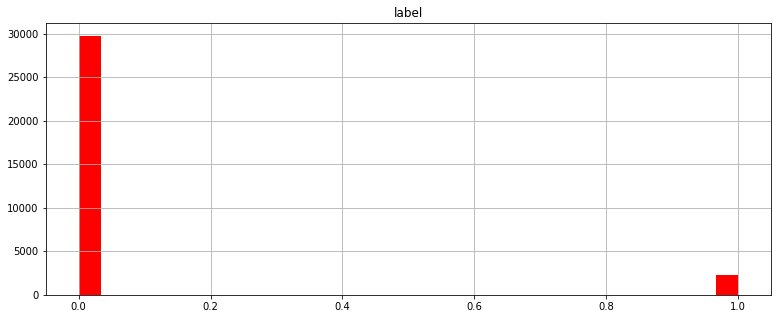

In [12]:
df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

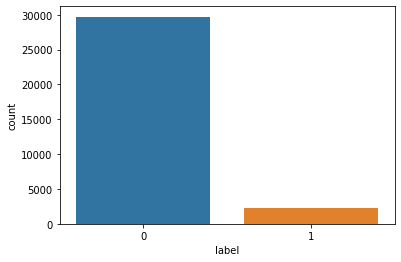

In [14]:
sns.countplot(data=df,x="label")

In [15]:
# Let's get the length of the messages
df['length'] = df['tweet'].apply(len)

In [16]:
df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


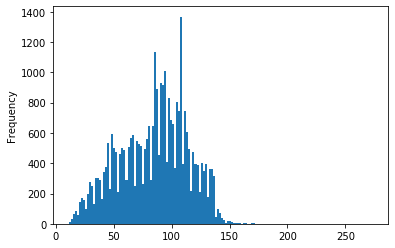

In [20]:
df['length'].plot(bins=150, kind='hist') 

In [19]:
df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [22]:
# Let's see the shortest message 
df[df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [24]:
#lET'S see the largest message
df[df['length']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [25]:
positive = df[df['label']==0]

In [26]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [27]:
negative = df[df['label']==1]

In [28]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# PLOT THE WORDCLOUD

In [29]:
sentences = df['tweet'].tolist()

In [30]:
len(sentences)

31962

In [31]:
sentences_as_one_string = " ".join(sentences)

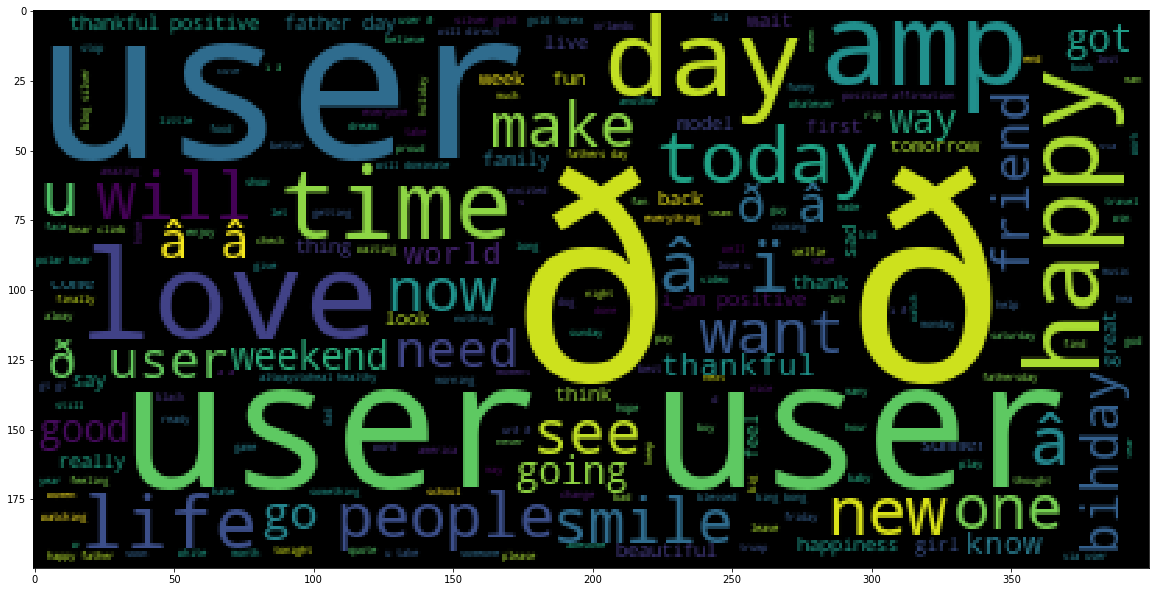

In [32]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

MINI CHALLENGE #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

In [35]:
negative_as_one_string = " ".join(negative['tweet'].tolist())

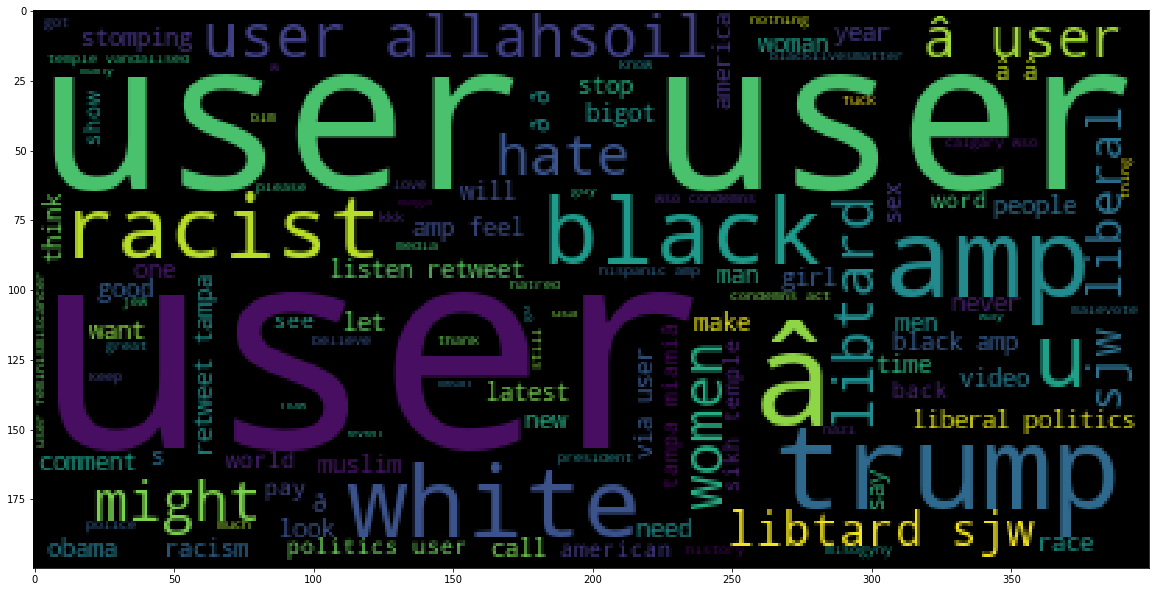

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_as_one_string))

In [37]:
positive_as_one_string = " ".join(positive['tweet'].tolist())

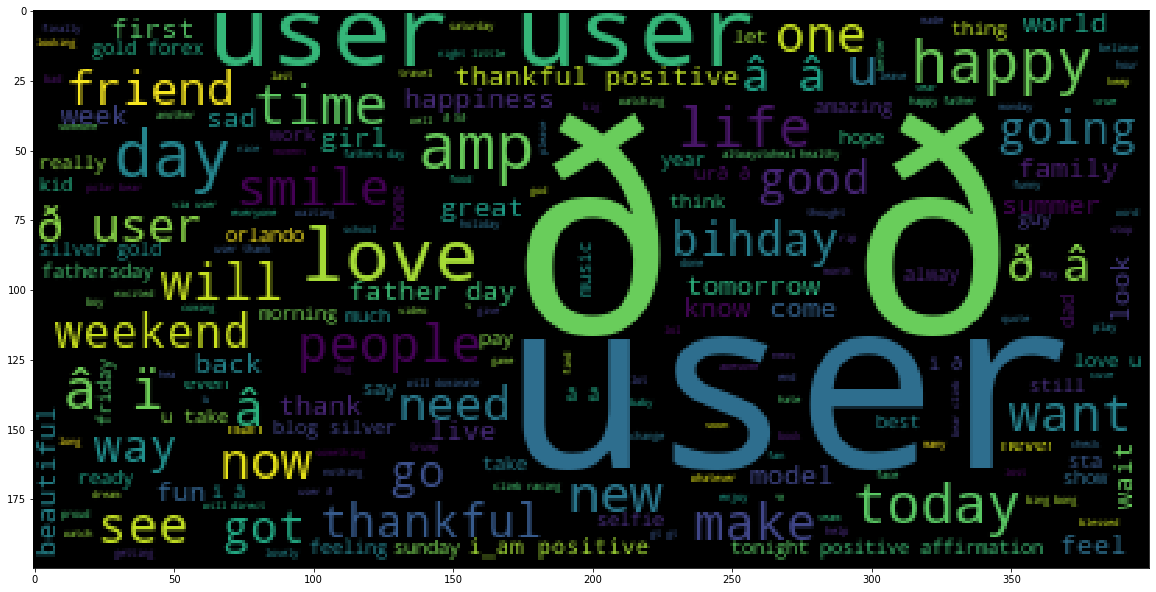

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_as_one_string))

# DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [41]:
test_punc_removed = [char for char in Test if char not in string.punctuation]
test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [42]:
# Join the characters again to form the string.
Test = "".join(test_punc_removed)
Test

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [43]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
Test = ''.join(test_punc_removed)
Test

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# DATA CLEANING - REMOVE STOPWORDS

In [44]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
test_clean = [word for word in Test.split() if word.lower() not in stopwords.words('english')]

In [49]:
test_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [50]:
Test_punc_removed_join_clean = " ".join(test_clean)
Test_punc_removed_join_clean

'Good morning beautiful people fun learning Machine learning AI'

In [56]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [57]:
mini_challenge_punc_removed = [char for char in mini_challenge if char not in string.punctuation]
mini_challenge_punr = "".join(mini_challenge_punc_removed)
mini_challenge_punr

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [59]:
mini_challenge_clean = [word for word in mini_challenge_punr.split() if word.lower() not in stopwords.words('english')]
mini_challenge = " ".join(mini_challenge_clean)
mini_challenge

'mini challenge teach remove stopwords punctuations'

# PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

cv = CountVectorizer()
x = cv.fit_transform(sample_data)


In [62]:
print(cv.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [63]:
print(x.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


#  CREATING A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [66]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [67]:
# Let's test the newly added function
tweets_df_clean = df['tweet'].apply(message_cleaning)

In [68]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [70]:
print(df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(df['tweet'])

In [76]:
print(vectorizer.get_feature_names())


['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [77]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
tweets_countvectorizer.shape

(31962, 47386)

In [79]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [80]:
X = tweets


In [81]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y = df['label']

# TRAINING A NAIVE BAYES CLASSIFIER MODEL

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# MODEL PERFORMANCE  EVALUATION

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

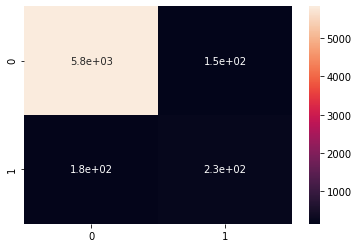

In [87]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [90]:
report = classification_report(y_test,y_predict_test)

In [91]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5979
           1       0.60      0.56      0.58       414

    accuracy                           0.95      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.95      0.95      0.95      6393



**Therefore our Model runs succesfully and predicts output with good results.**